In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

df = pd.read_csv("./data/marketing_campaign.csv",sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Предварителна преработка на данните

### Премахване на характеристики

In [379]:
# Премахване на ID колоната
df.drop(labels='ID',axis=1,inplace=True)

In [380]:
# Типовете на колоните
pd.DataFrame(df.dtypes).transpose()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,int64,object,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Categorical features: education, marital_status

Convert 'dt_customer' to datetime objects

In [381]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [382]:
# Поглед върху числените хар. 
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [383]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [384]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

Характеристиките Z_CostContact и Z_Revenue съдържат само една стойност. За клъстеризацията ще трябва да нормализираме характеристиките по (x-mean)/std. Тези две характеристики не носят информация и биха хвърлили грешка при нормализирането, т.к. std=0. Затова ще бъдат премахнати.

In [385]:
df.drop(labels=['Z_Revenue', 'Z_CostContact'],axis=1,inplace=True)

### Визиалузация на характеристиките

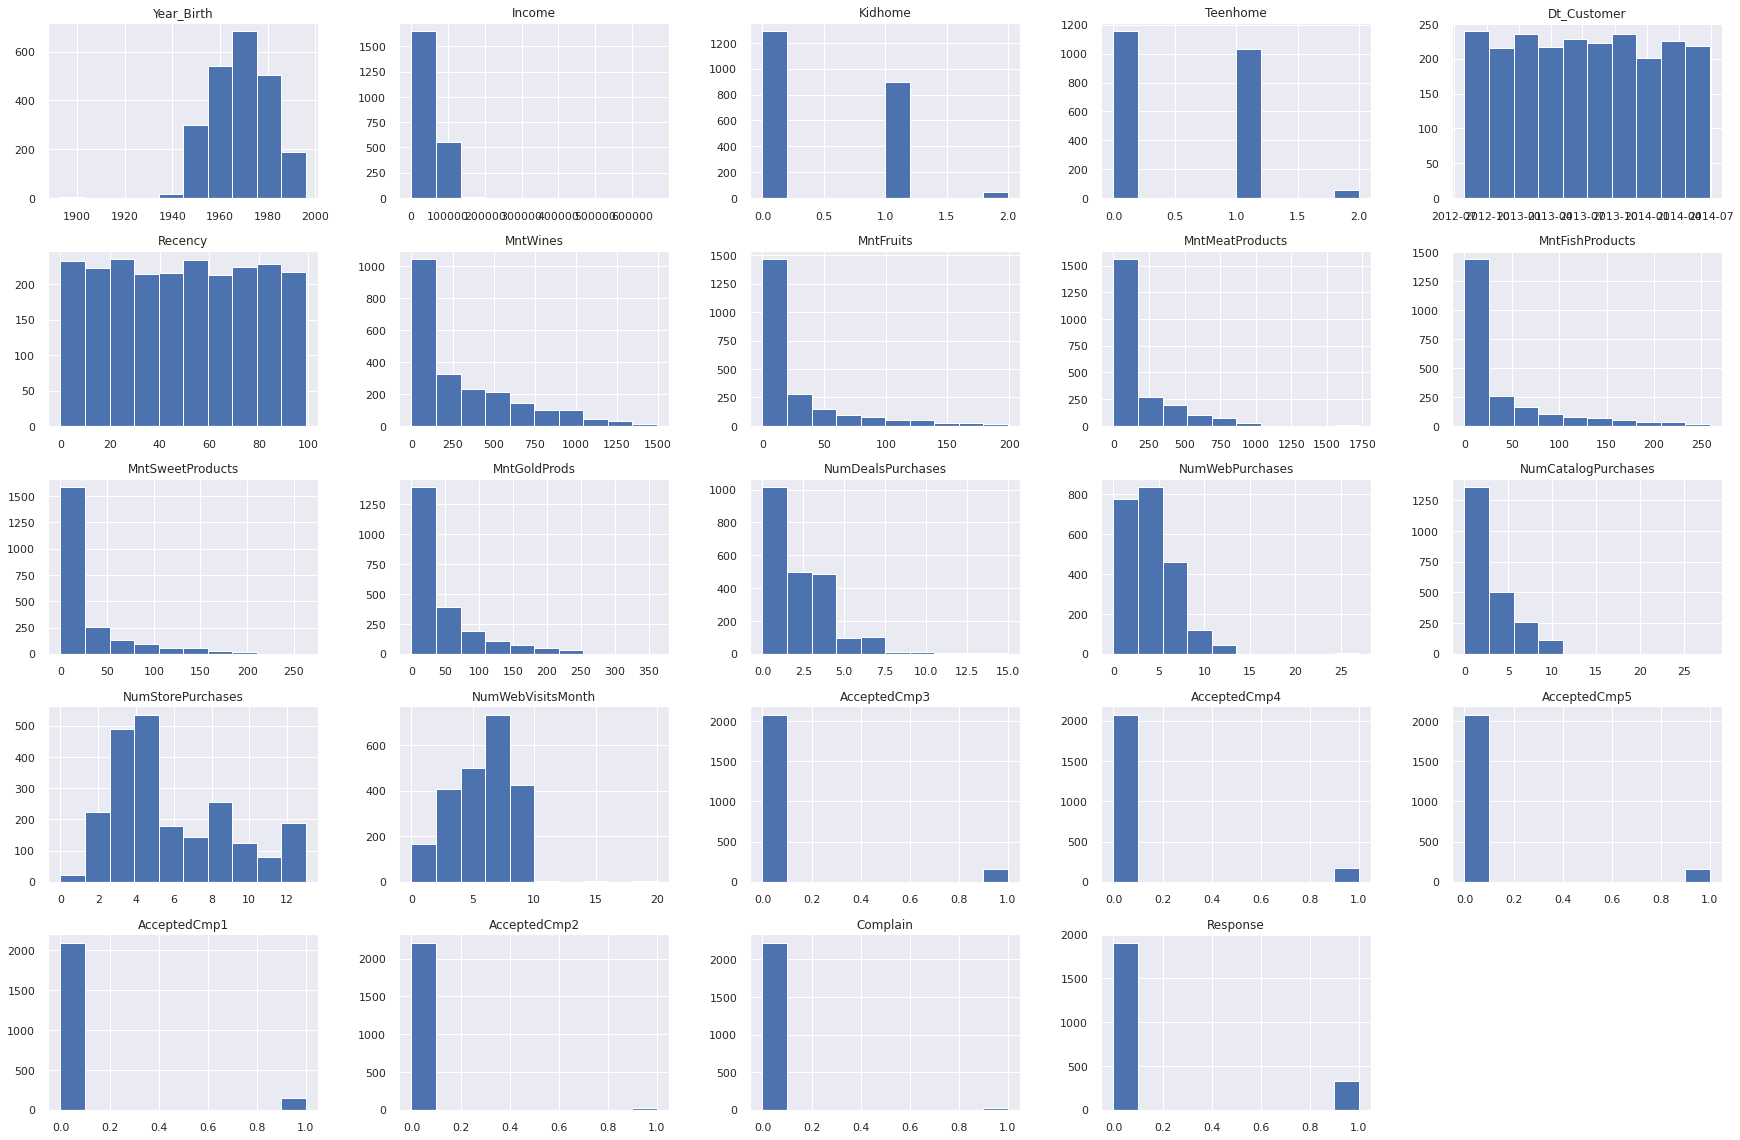

In [386]:
# Числените характеристики
df.hist(figsize=(30,20));

При клъстеризацията няма условия за разпределението на характеристиките, но outliers намаляват ефективността на k-means и при някои linkage функции при agglomerative.

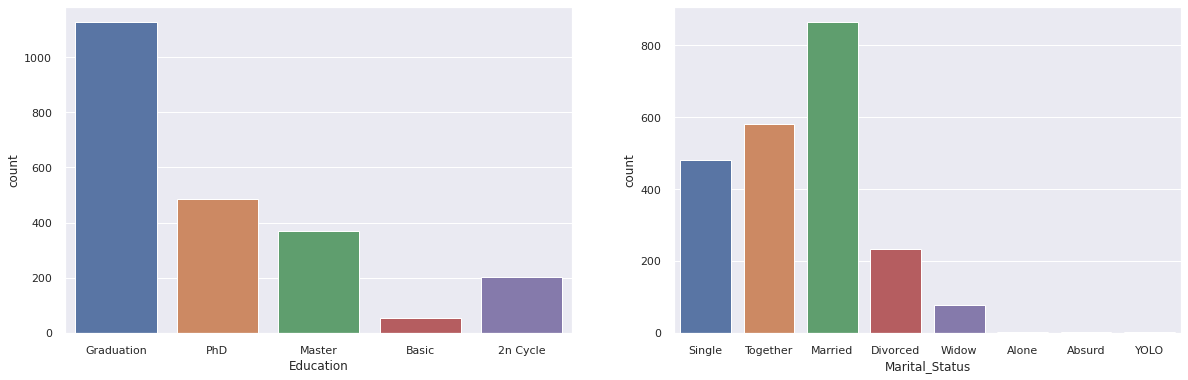

In [387]:
# Категорийните
cats = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(cats),figsize=(20,6))
for i, cat in enumerate(cats):
    sns.countplot(data=df, x=cat, ax=axes[i])

In [388]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [389]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [390]:
# Има 2240 наблюдения и може да премахнем тези Alone, Absurd и YOLO, който са 7.
df = df[df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO']) == False]
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

### Премахване на празни стойности

In [391]:
pd.DataFrame(df.isnull().sum()).transpose()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Има 24 празни стойности (1%) за Income. Може да бъдат премахнати, но може да бъдат заменени с медианата (не с средната стойност, т.к. има големи outliers при Income)

In [392]:
print("Median of Income:", df['Income'].median())

Median of Income: 51390.0


In [393]:
# Проверка на празните стойности в Income
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


Всички други стойности изглеждат ок.

In [394]:
# Запълване на празните стойности с медианата
df['Income'] = df['Income'].fillna(df['Income'].median())

### Добавяне на Tenure
Харастеристиката Dt_Customer е от кога човекът е клиент на магазина, но така като е дата не е много информативно. Може да се преобразува в Tenure - колко дълго е бил клиент.

За ответна точка ще използваме най-скорошния клиент.

In [395]:
most_recent = df['Dt_Customer'].max()
oldest = df['Dt_Customer'].min()
most_recent - oldest

Timedelta('699 days 00:00:00')

Разликата между най-скорошния и най-дългосрочния клиент е почти 2 години. За Tenure може да използваме месеци тогава.

In [396]:
# Функция за отрязване до n-тия знак
def trunc(arr, n=0):
    return np.trunc(arr*10**n) / (10**n)

df['Tenure'] = (most_recent-df['Dt_Customer'])/np.timedelta64(1, 'M')
df['Tenure'] = trunc(df['Tenure'], 1)

In [397]:
df.drop('Dt_Customer', axis=1, inplace=True)

### Добавяне на SuccessfulPromos
Премахване на отделните отговори за всяка кампания и добавяне на нова характеристика SuccessfulPromos - броя кампании, на които са отговорили.

In [398]:
df['SuccessfulPromos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [399]:
df = df.drop(labels=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response'], axis=1)

### Complain към категорийна характеристика

In [400]:
df['Complain'] = np.where(df['Complain'] == 1, 'yes', 'no')

### Корелации между числените характеристики
Колинеарността не е проблем, но ако имаме характеристики, които не носят нова информация, си уголемяваме пространството за нищо.

<AxesSubplot:>

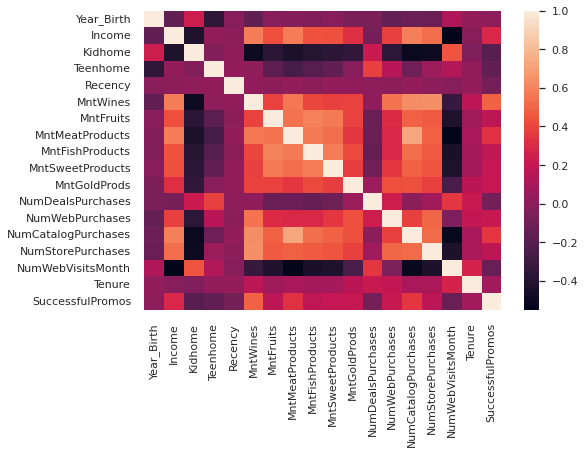

In [401]:
# Корелация между две
sns.heatmap(df.corr())

VIF: регресира всяка характеристика върху всички останали и VIF = 1/(1-R2). Проверява за колинеарност между няколко характеристики, а не само две. Ако е >5 има мултиколинеарност.

In [402]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X_numerical = df.select_dtypes(include=np.number) # the numerical variables
scaler = StandardScaler().set_output(transform='pandas') # интерпретиране на vif

X_numerical_scaled = scaler.fit_transform(X_numerical) # dataframe

vif = pd.DataFrame()
vif["feature"] = X_numerical_scaled.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X_numerical_scaled.values, i)
                          for i in range(X_numerical_scaled.shape[1])]
  
vif

,feature,VIF
0,Year_Birth,1.232754
1,Income,2.171341
2,Kidhome,1.870832
3,Teenhome,1.599971
4,Recency,1.021037
5,MntWines,3.136643
6,MntFruits,1.932661
7,MntMeatProducts,2.918619
8,MntFishProducts,2.083576
9,MntSweetProducts,1.909079


### Ефект на категорийните данни

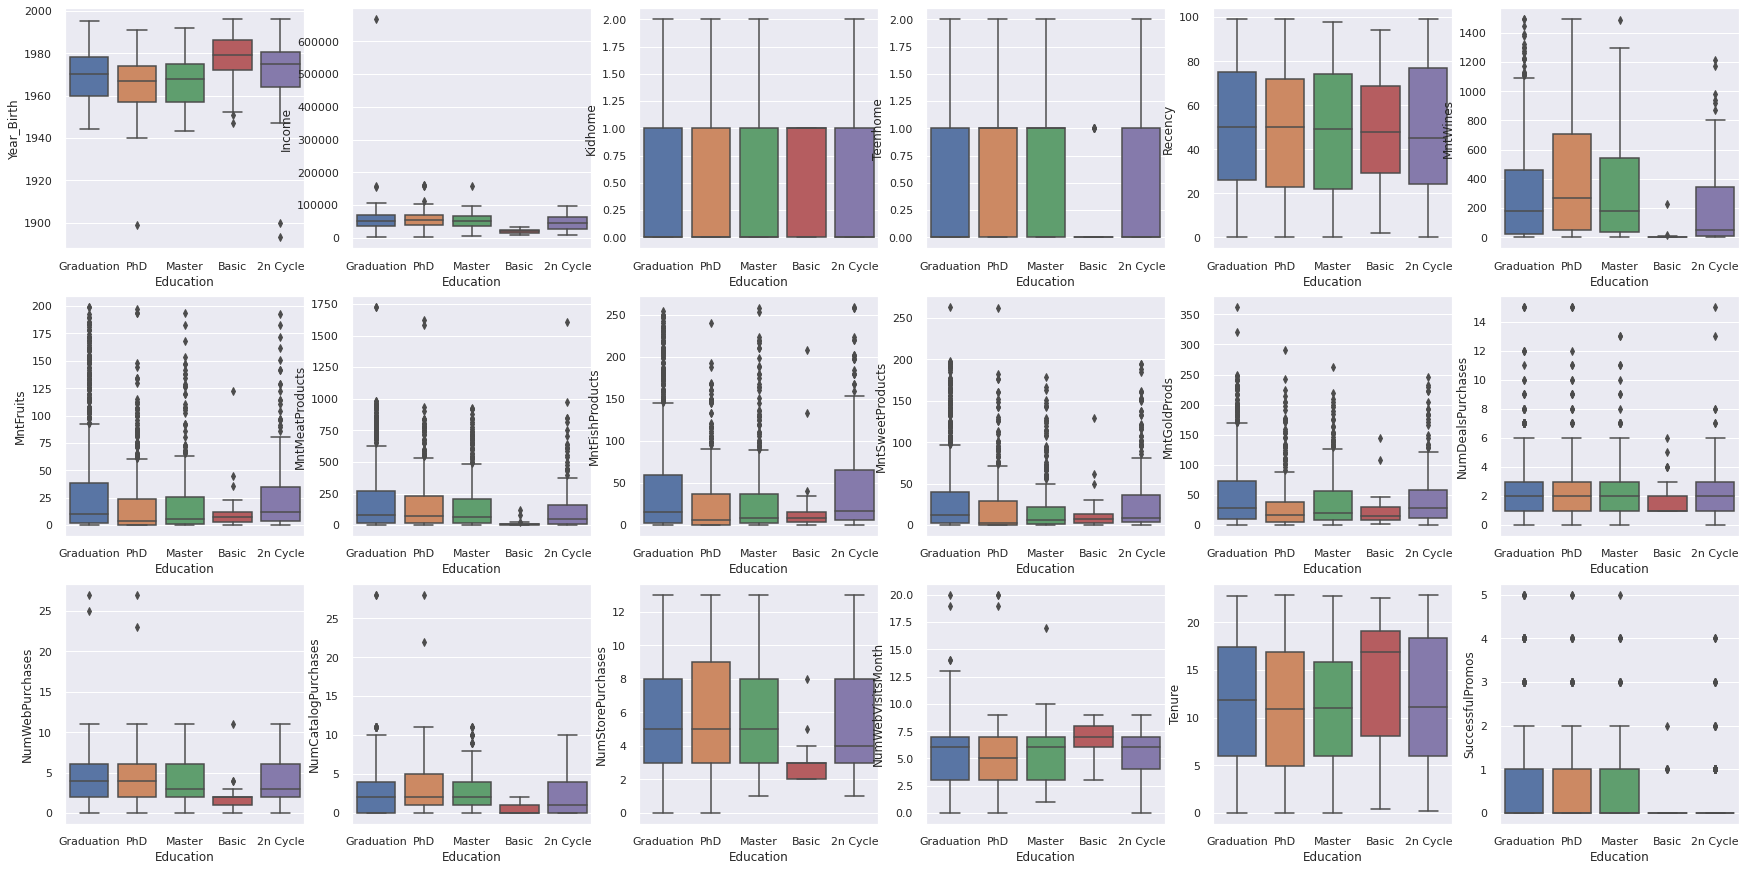

In [403]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.boxplot(data=df, x = 'Education', y = column, ax=ax);

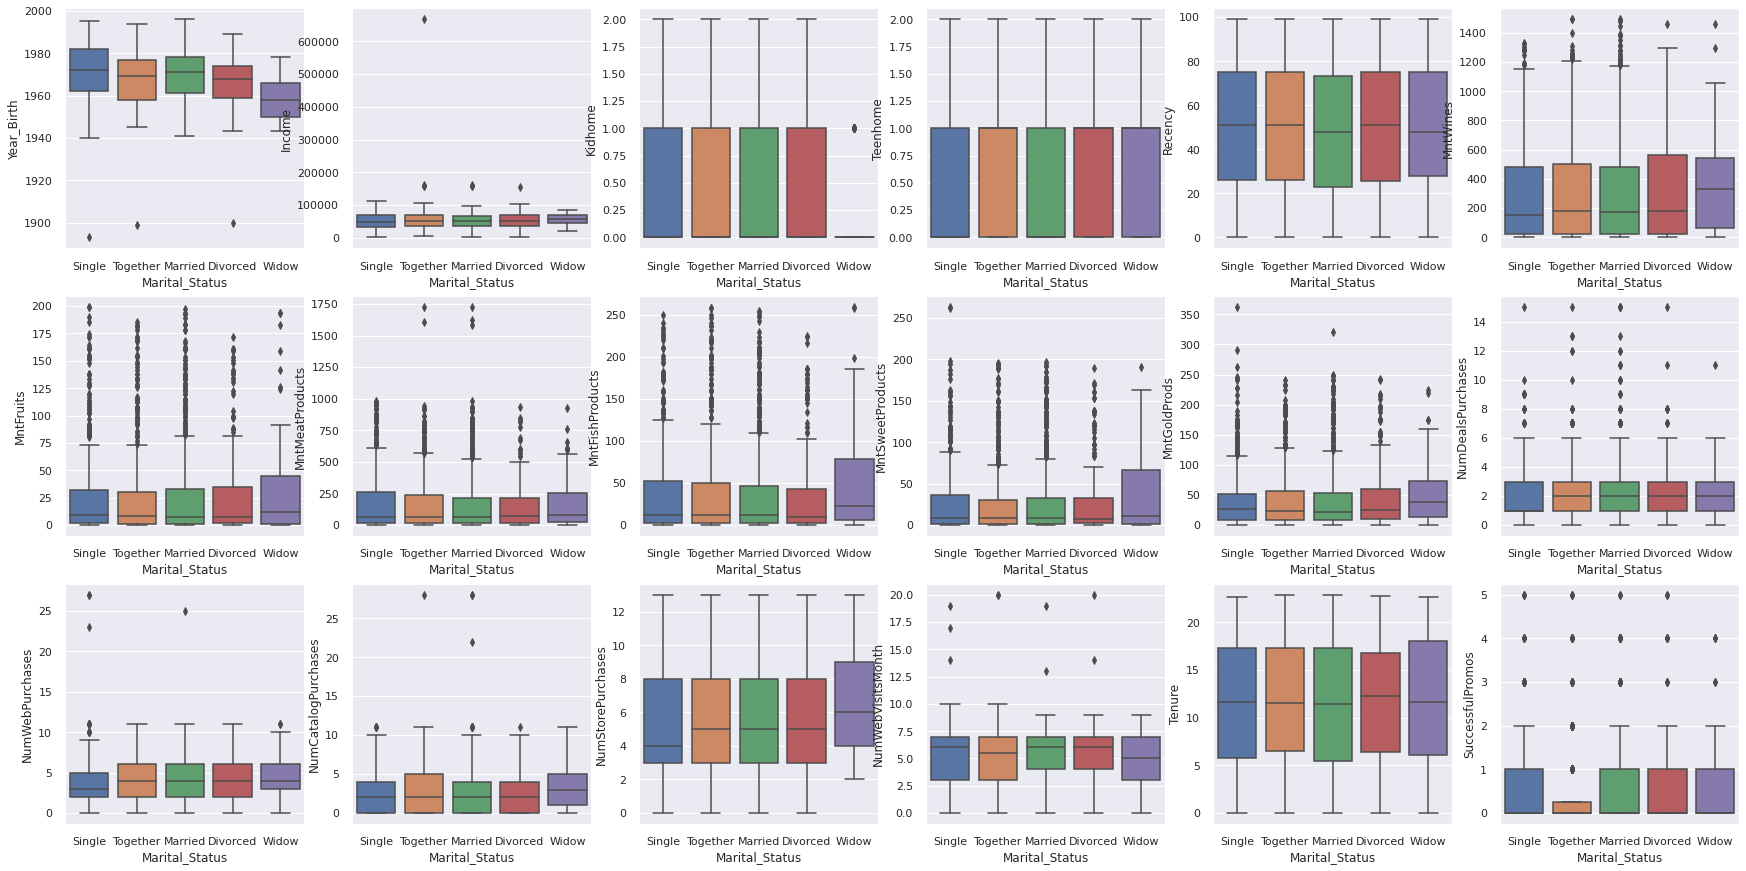

In [404]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.boxplot(data=df, x = 'Marital_Status', y = column, ax=ax);

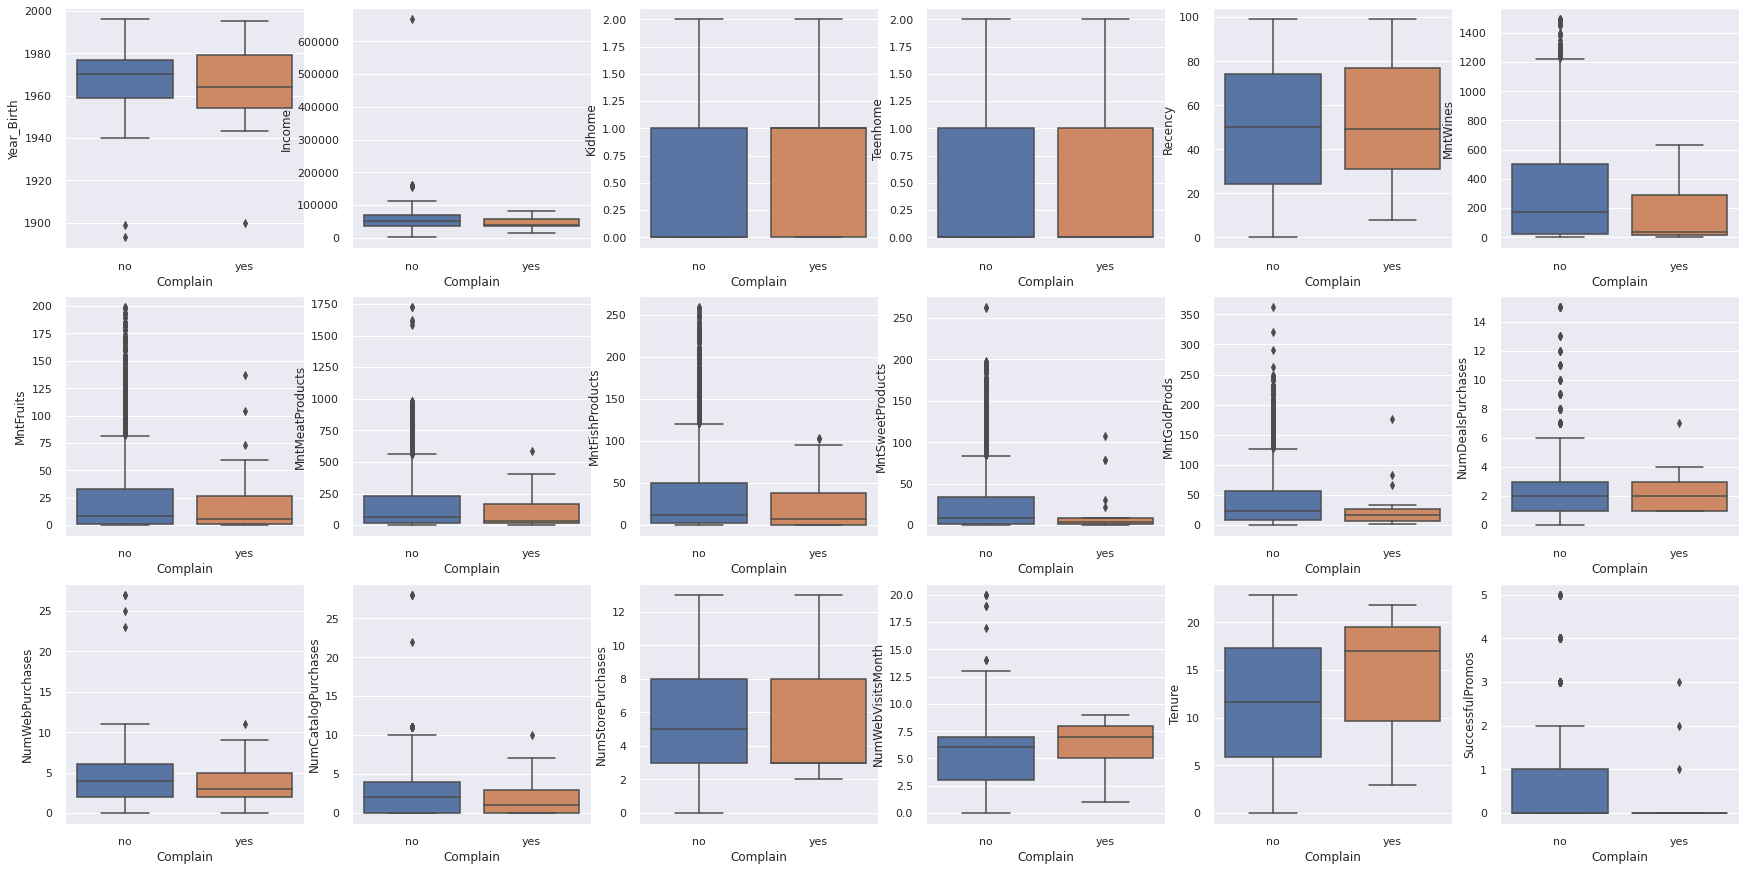

In [405]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.boxplot(data=df, x = 'Complain', y = column, ax=ax);

Изглежда, че категорийните не допринасят много инфо за числените. Boxplot-овете за отделните категории си приличат доста.

### Проверка за outliers

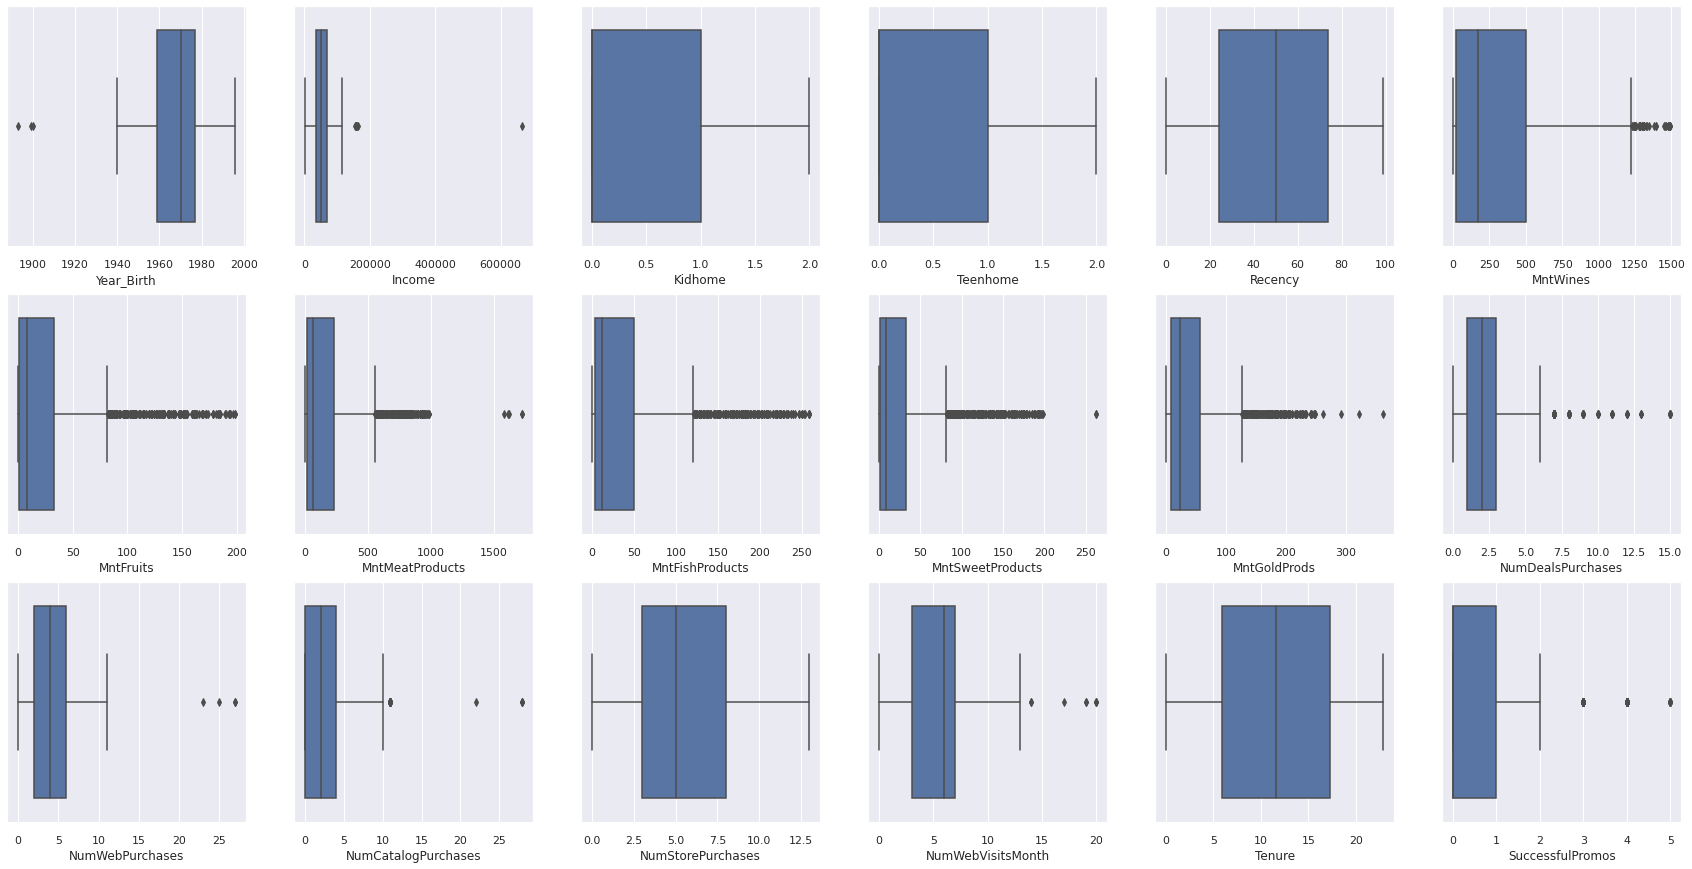

In [406]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.boxplot(data=df, x = column, ax=ax);

In [407]:
# 15 най-високите домакински доходи
df.nlargest(15, 'Income')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure,SuccessfulPromos
2233,1977,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,no,12.8,0
617,1976,PhD,Together,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,no,12.8,0
687,1982,PhD,Married,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,no,22.8,0
1300,1971,Master,Together,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,no,12.8,0
164,1973,PhD,Married,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,no,3.9,0
1653,1977,Graduation,Together,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,no,13.9,0
2132,1949,PhD,Married,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,no,9.9,0
655,1975,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,no,4.6,0
1898,1945,PhD,Single,113734.0,0,0,9,6,2,3,1,262,3,0,27,0,0,1,no,1.0,0
646,1970,Graduation,Together,105471.0,0,0,36,1009,181,104,202,21,207,0,9,8,13,3,no,17.2,3


Доход 666,666 изглежда малко подозрително, но ок

In [408]:
df[df['Year_Birth'] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure,SuccessfulPromos
192,1900,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,yes,9.0,0
239,1893,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,no,1.4,0
339,1899,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,no,9.0,1


Mixed data -> can't do outlier detection 


### Стандартизиране

В този случай е ненужно one-hot encoding за категорийните данни, тъй като после приложеният dimensionality reduction ще се оправи с тях.

In [409]:
X_categorical = df.select_dtypes(include='object')

In [410]:
X = pd.concat((X_numerical_scaled, X_categorical), axis = 1)
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Tenure,SuccessfulPromos,Education,Marital_Status,Complain
0,-0.984495,0.235589,-0.825110,-0.929287,0.304866,0.982453,1.551373,1.677826,2.471192,1.473929,0.848047,0.351447,1.411427,2.512110,-0.550633,0.694329,1.527236,0.623484,Graduation,Single,no
1,-1.234984,-0.235094,1.032219,0.907083,-0.385846,-0.869852,-0.636172,-0.713459,-0.650974,-0.631974,-0.728938,-0.166219,-1.109947,-0.568927,-1.165261,-0.130371,-1.185646,-0.501104,Graduation,Single,no
2,-0.316523,0.773359,-0.825110,-0.929287,-0.800273,0.362050,0.570749,-0.177634,1.350885,-0.147858,-0.036603,-0.683885,1.411427,-0.226590,1.293251,-0.542721,-0.205994,-0.501104,Graduation,Together,no
3,1.269908,-1.021216,1.032219,-0.929287,-0.800273,-0.869852,-0.560739,-0.651463,-0.504049,-0.583562,-0.748169,-0.166219,-0.749750,-0.911265,-0.550633,0.281979,-1.065073,-0.501104,Graduation,Together,no
4,1.019419,0.241775,1.032219,-0.929287,1.548148,-0.388965,0.419884,-0.217489,0.157116,-0.002623,-0.555854,1.386779,0.330839,0.115748,0.063995,-0.130371,-0.959572,-0.501104,PhD,Married,no


### Визуализация на данните в 2D чрез t-SNE

t-SNE проектира данните в нискомерно пространство и за всяка точка изчислява similarity score за всички други точки. 

За всикчи точки една по една се използва стандартното student-t distribution, по което се оценява по разстояние останалите точки (точката по средата е самата точка и тя е на разстояние 0 от себе си). Тези t-score се нормализират, така че да имат сбор 1. Така се формира similarity score. Това не е симетрично операция, затова после sim_score(x,y) и sim_score(y,x) се осредняват, за да се формира симетрична матрица.

Същото се прави, но и във високомерното пространството и с нормалното разпределение и отново се формира матрица.

Това са две разпределения и за приближаването на нискомерното да високомерното се използва Kullback-Leibler divergence.

In [411]:
# Perplexity parameter: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE
tsne_models = []

for perplexity in range(5,55,5):
   tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
   trans_data = tsne.fit_transform(X_numerical_scaled).T
   tsne_models.append((tsne,trans_data,perplexity))

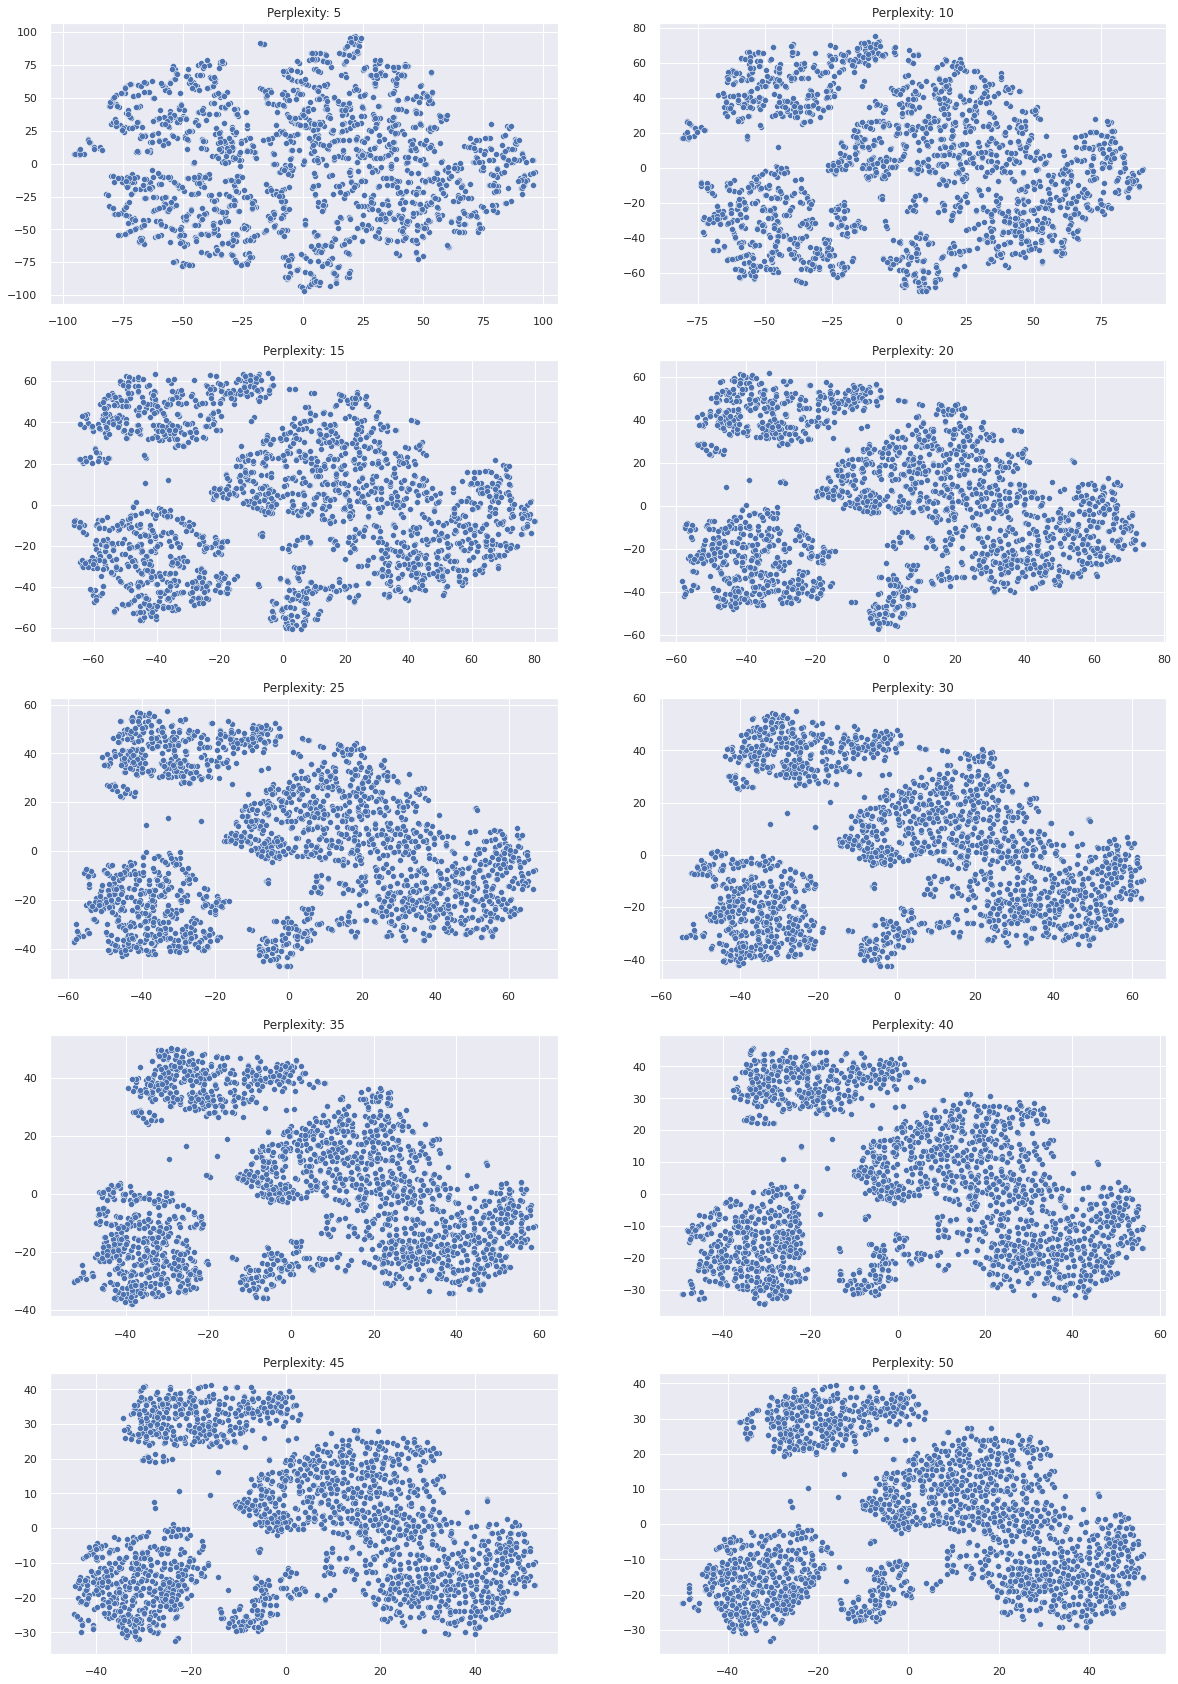

In [412]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,30))
for (_, data, perplexity), ax in zip(tsne_models, axes.flat):
    sns.scatterplot(x=data[0], y=data[1], ax=ax).set(title='Perplexity: {}'.format(perplexity));

t-SNE не носи информация за разстоянието между клъстерите или големината им, а само дали наистина има нещо като клъстери. От тези графики се вижда, че може да търсим 3-6 клъстера. Не е включена информацията от Complain, Education, Marital_Status (X_numerical).

#### Checkpoint

In [413]:
# Save as .csv
X.to_csv('./data/preprocessed_data.csv')

## Моделиране на данните

### FAMD (dimensionality reduction)

Тъй като имаме смес от данни - числени и категорийни, алгоритмите за клъстеризация няма да работят добре. Първо ще използваме FAMD (Factor Analysis of Mixed Data), за да намалим размерността. FAMD най-просто прилага PCA върху числените характеристики и MFA за категорийните.

In [414]:
X.dtypes

Year_Birth             float64
Income                 float64
Kidhome                float64
Teenhome               float64
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
Tenure                 float64
SuccessfulPromos       float64
Education               object
Marital_Status          object
Complain                object
dtype: object

In [415]:
print("X has {} features currently.".format(X.shape[1]))

X has 21 features currently.


In [416]:
from prince import FAMD
famd = FAMD(n_components=X.shape[1])
famd = famd.fit(X)

In [417]:
famd.explained_inertia_

array([0.20836557, 0.07175974, 0.06747614, 0.05835739, 0.05073437,
       0.04928441, 0.04484523, 0.04058785, 0.03969424, 0.03767214,
       0.03624399, 0.03432788, 0.03209793, 0.02856043, 0.02558241,
       0.02403004, 0.02171972, 0.02015294, 0.01691537, 0.01534946,
       0.014933  ])

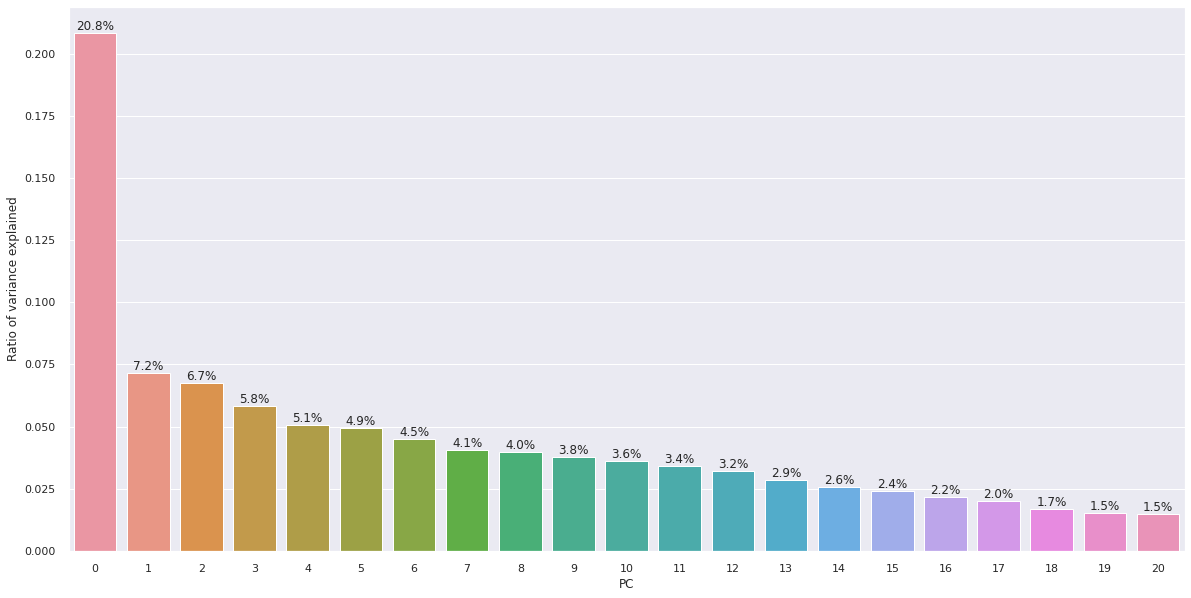

In [418]:
percents = famd.explained_inertia_
pc = list(range(0,len(percents)))

plt.figure(figsize=(20, 10))
g = sns.barplot(x = pc, y = percents)
for container in g.containers:
    labels = ["{:.1f}%".format(label) for label in np.multiply(container.datavalues, 100)]
    g.bar_label(container, fmt='%.2f%%', labels=labels)
    
plt.xlabel('PC')
plt.ylabel('Ratio of variance explained');

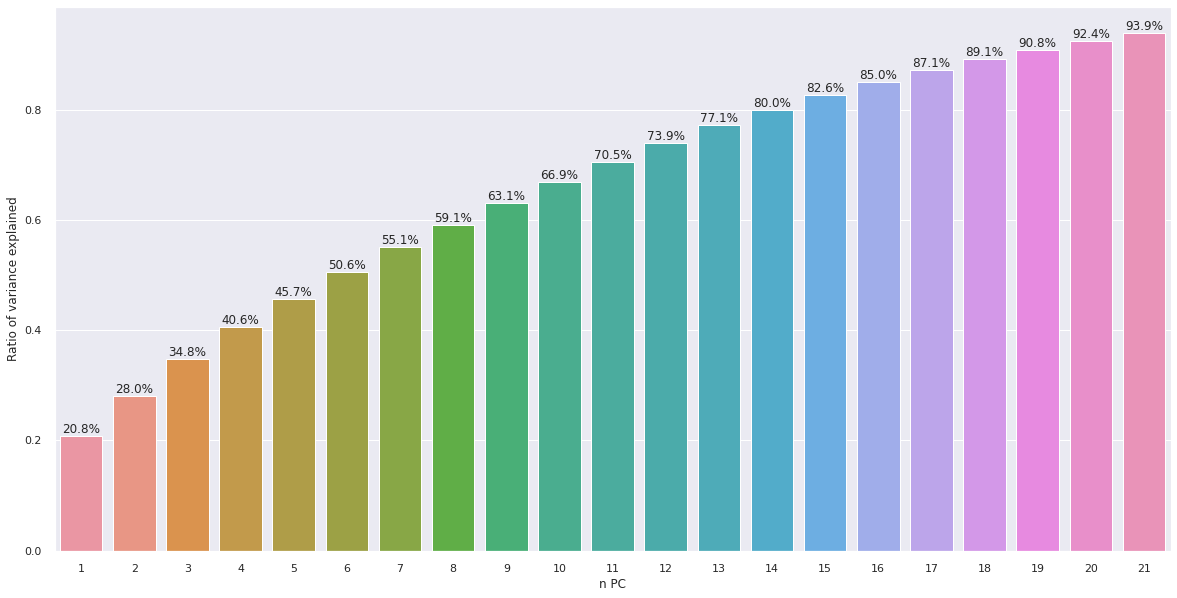

In [419]:
cumulative = np.cumsum(percents)

plt.figure(figsize=(20,10))
g = sns.barplot(x = np.add(pc,1), y = cumulative)
for container in g.containers:
    labels = ["{:.1f}%".format(label) for label in np.multiply(container.datavalues, 100)]
    g.bar_label(container, fmt='%.2f%%', labels=labels)
    
plt.xlabel('n PC')
plt.ylabel('Ratio of variance explained');

Сборът не стига до 100%, защото алгоритъмът добавя dummies за категорийните характеристики и затова самото пространство е по-голямо от X.shape[1].

In [420]:
famd = FAMD(n_components=3)
famd.fit(X)

FAMD(n_components=3)

In [421]:
X_reduced = famd.transform(X)
X_reduced.shape

(2233, 3)

### k-Means

In [422]:
from sklearn.cluster import KMeans
models = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, n_init='auto') # FutureWarning
    kmeans.fit(X_reduced)
    models.append((kmeans, k))

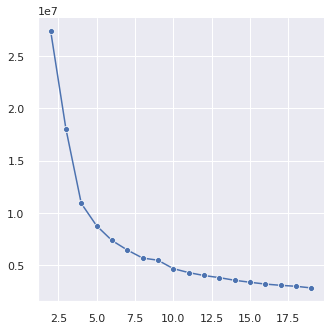

In [423]:
k = [k for _, k in models]
inertias = [model.inertia_ for model, _ in models]
sns.relplot(x = k, y = inertias, kind='line', marker='o');

Elbow Method: няма силно изразане сгъвка.

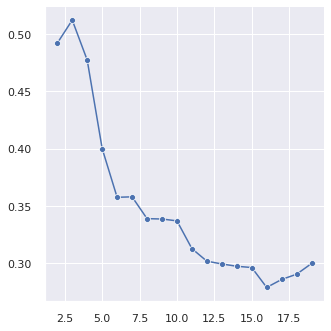

In [424]:
from sklearn.metrics import silhouette_score

scores = [silhouette_score(X_reduced, model.labels_) for model, _ in models]
sns.relplot(x = k, y = scores, kind='line', marker='o');

Силует за една точка: (b-a)/max(a,b), където b = средното разстоянието до най-близкия друг клъстер и а - средното разстояние до другите точки в своя клъстер. Silhouette score e средната стойност на всички силуети. [-1,1]. Описва колко са ясно разграничени клъстерите и колко са еднородни точките в един клъстер. Метрика correlation, заради размерността, а не Евклидово.

3 изглежда като добър избор.

In [425]:
kmeans= KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_reduced)

KMeans(n_clusters=3, n_init='auto')

Проверка на клъстерите

In [426]:
df_w_clusters = df.copy()
df_w_clusters['cluster'] = kmeans.labels_

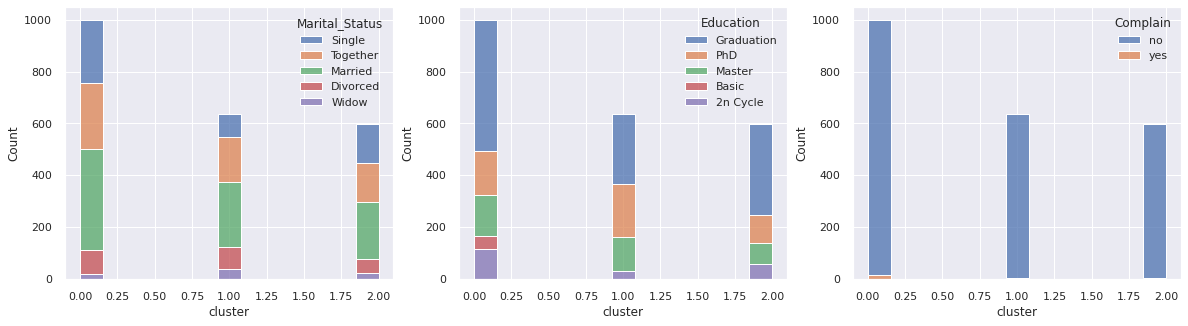

In [427]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for column, ax in zip(['Marital_Status', 'Education', 'Complain'], axes.flat):
    sns.histplot(data=df_w_clusters, x='cluster', hue=column, multiple='stack', ax = ax);

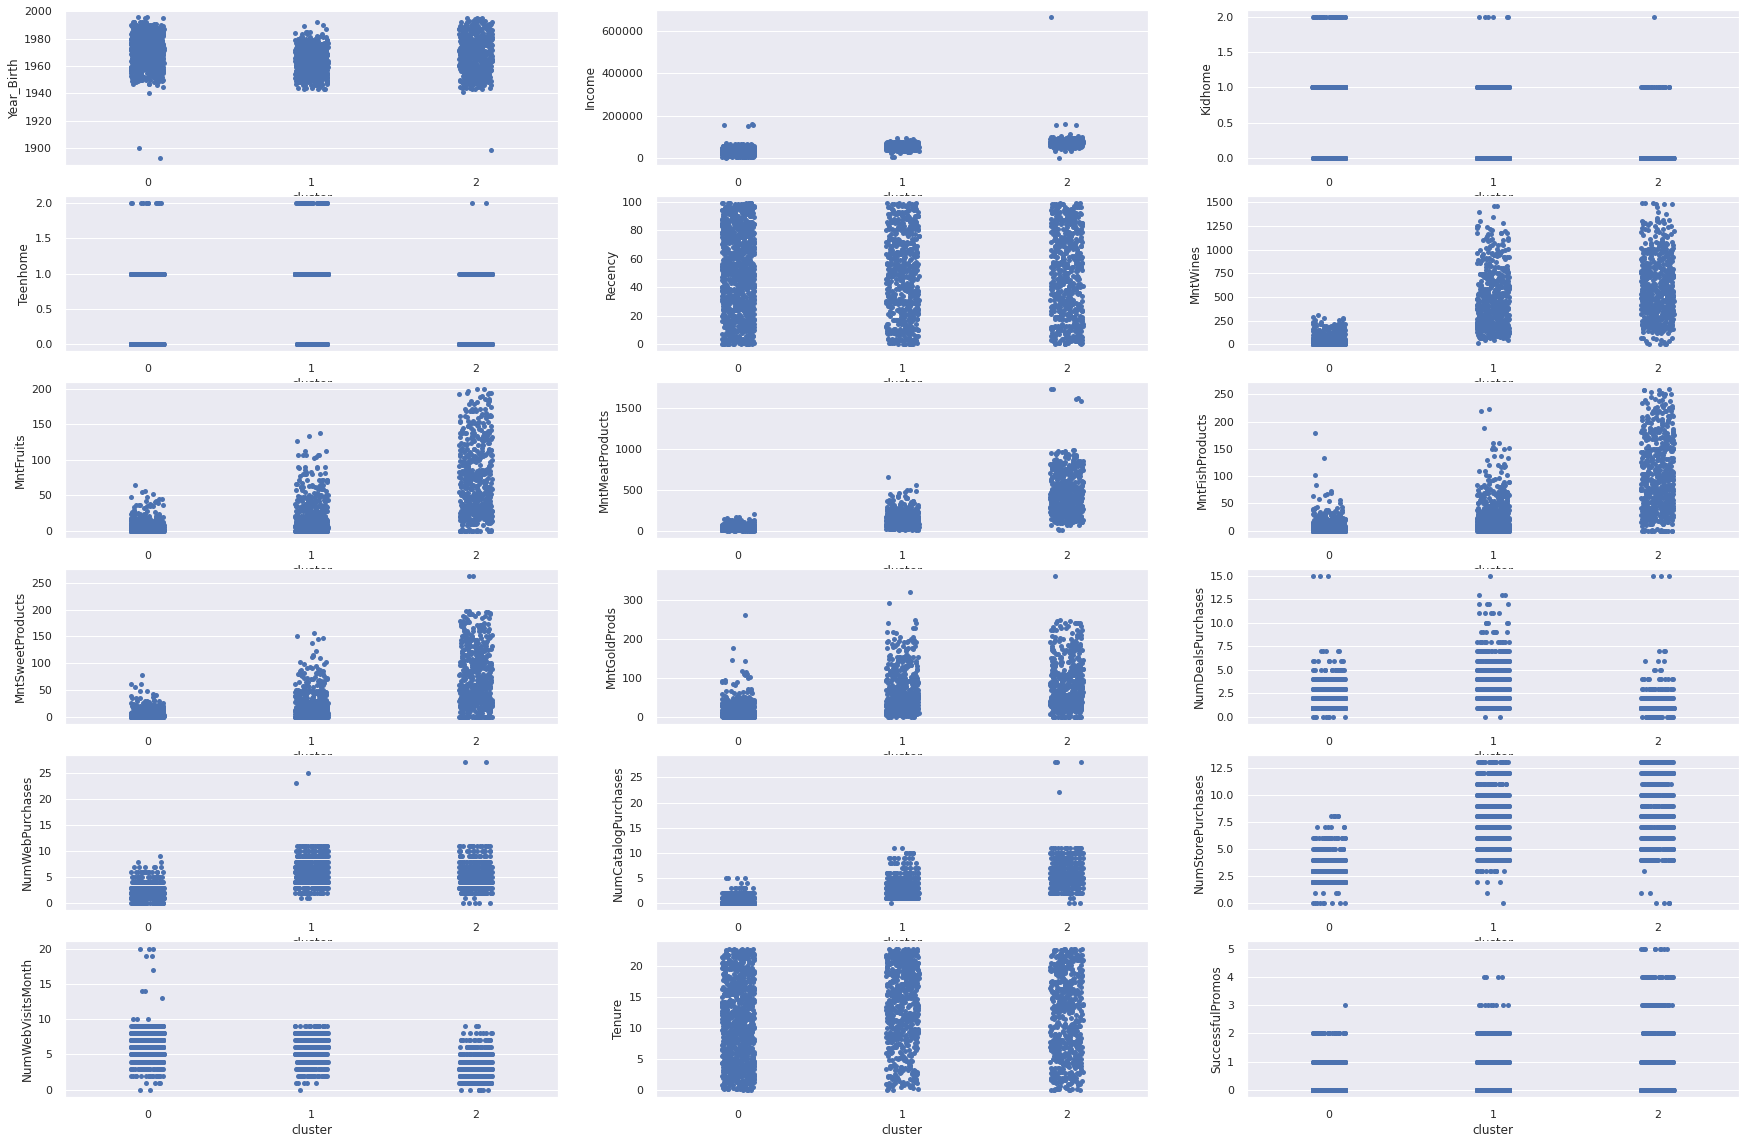

In [428]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30,20))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.stripplot(data=df_w_clusters, x = 'cluster', y = column, ax=ax);

Клъстер 0 са с най-нисък доход, пазаруват най-малки количества, откликват на най-малко промо кампании и на оферти. 

Клъстер 1 са със среден доход, по-стари хора, купуват в средни количества и са най-склонни да купуват оферти.

Клъстер 2 са с най-висок доход, с по-малко деца и също не купуват на оферта, но откликват на кампании най-много и пазаруват в големи количества.

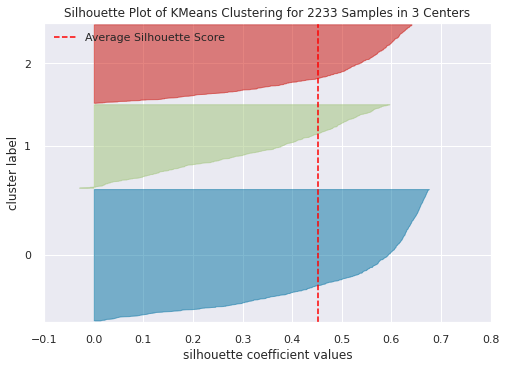

In [429]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(kmeans, X_reduced, colors='yellowbrick');

In [591]:
def plot_clusters_3D(X_reduced, cluster_labels):
    X_reduced_c = np.column_stack((X_reduced, cluster_labels))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for s in np.unique(cluster_labels):
        ax.scatter(X_reduced_c[X_reduced_c[:,3] == s,0], X_reduced_c[X_reduced_c[:,3] == s, 1], X_reduced_c[X_reduced_c[:,3] == s, 2],label=s)
    
    ax.set_xlim3d(-500, 500)
    ax.set_ylim3d(-500, 500)
    ax.set_zlim3d(-500, 500)
    ax.legend();

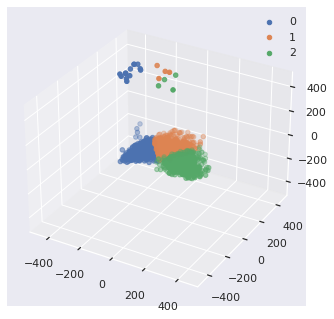

In [592]:
plot_clusters_3D(X_reduced, kmeans.labels_)

### DBSCAN

#### Избор на хиперпараметрите

In [432]:
features = X_reduced.shape[1]

Използваме най-близките съседи, за да намерим средното им разстояние, за eps параметъра.

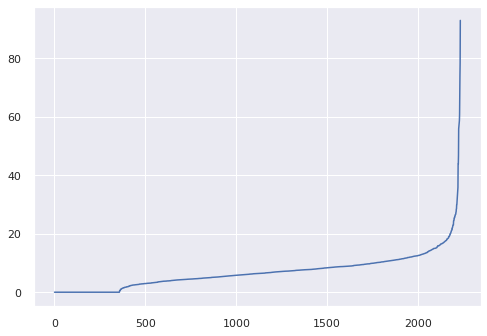

In [433]:
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2*features)
X_fitted = neighbors.fit(X_reduced)
d, _ = X_fitted .kneighbors(X_reduced)
d = np.sort(d, axis=0)
d = d[:,1]
plt.plot(d);

In [ ]:
from sklearn.cluster import DBSCAN
for eps in np.arange(.0001,.001,.0001):
    for min_samples in range(features+2, 5*features, 1):
        print('-----------')
        print("eps: {}, min_samples = {}".format(eps, min_samples))
        dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric='correlation')
        dbscan.fit(X_reduced)
        clusters = np.unique(dbscan.labels_)
        print("Clusters:", len(clusters))

        # Don't calculate sil for -1 noise data
        stacked = np.column_stack((X_reduced, dbscan.labels_))
        masked = stacked[stacked[:, -1] != -1, :]
        
        flag = 1 if -1 in clusters else 0
        if len(clusters) - flag > 1:
            print("Silhoutte score:", silhouette_score(masked[:,:-1], masked[:,-1]))
        if flag == 1:
            print("Points classifed as noise:", sum(dbscan.labels_ == -1))

In [ ]:
for eps in np.arange(1,120,10):
    for min_samples in range(features+2, 5*features, 1):
        print('-----------')
        print("eps: {}, min_samples = {}".format(eps, min_samples))
        dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric='manhattan')
        dbscan.fit(X_reduced)
        clusters = np.unique(dbscan.labels_)
        print("Clusters:", len(clusters))

        # Don't calculate sil for -1 noise data
        stacked = np.column_stack((X_reduced, dbscan.labels_))
        masked = stacked[stacked[:, -1] != -1, :]
        
        flag = 1 if -1 in clusters else 0
        if len(clusters) - flag > 1:
            print("Silhoutte score:", silhouette_score(masked[:,:-1], masked[:,-1]))
        if flag == 1:
            print("Points classifed as noise:", sum(dbscan.labels_ == -1))

In [ ]:
for eps in np.arange(1,100,10):
    for min_samples in range(features+2, 5*features, 1):
        print('-----------')
        print("eps: {}, min_samples = {}".format(eps, min_samples))
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X_reduced)
        clusters = np.unique(dbscan.labels_)
        print("Clusters:", len(clusters))

        # Don't calculate sil for -1 noise data
        stacked = np.column_stack((X_reduced, dbscan.labels_))
        masked = stacked[stacked[:, -1] != -1, :]
        
        flag = 1 if -1 in clusters else 0
        if len(clusters) - flag > 1:
            print("Silhoutte score:", silhouette_score(masked[:,:-1], masked[:,-1]))
        if flag == 1:
            print("Points classifed as noise:", sum(dbscan.labels_ == -1))

Резултатът с най-добршо съотношение на cluster size, cluster number, silhoutte score, noisy data cluster (-1):

eps: 0.0007000000000000001, min_samples = 6

Clusters: 3

Silhoutte score: 0.4731678862747727

Points classifed as noise: 43

In [479]:
dbscan = dbscan = DBSCAN(eps = 0.0007, min_samples = 6, metric='correlation')
dbscan.fit(X_reduced)

DBSCAN(eps=0.0007, metric='correlation', min_samples=6)

In [480]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [481]:
df_w_clusters_db = df.copy()
df_w_clusters_db['cluster'] = dbscan.labels_

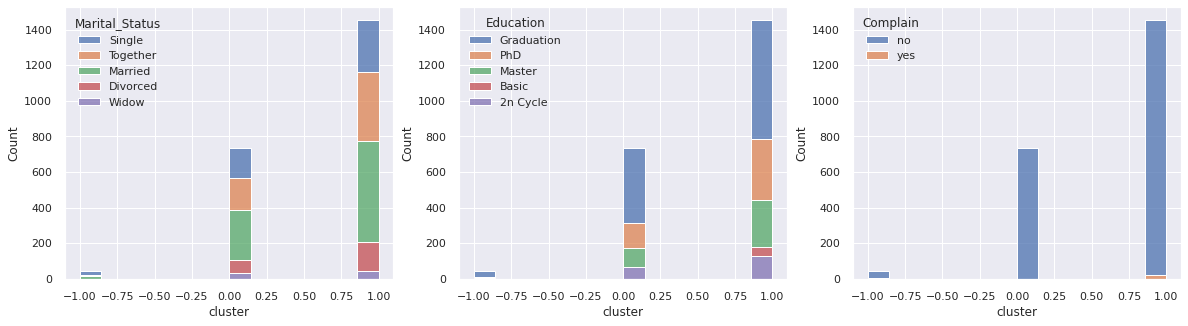

In [482]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for column, ax in zip(['Marital_Status', 'Education', 'Complain'], axes.flat):
    sns.histplot(data=df_w_clusters_db, x='cluster', hue=column, multiple='stack', ax = ax);
    #sns.countplot(data=df_w_clusters_db, x = 'cluster', hue = column, ax=ax);

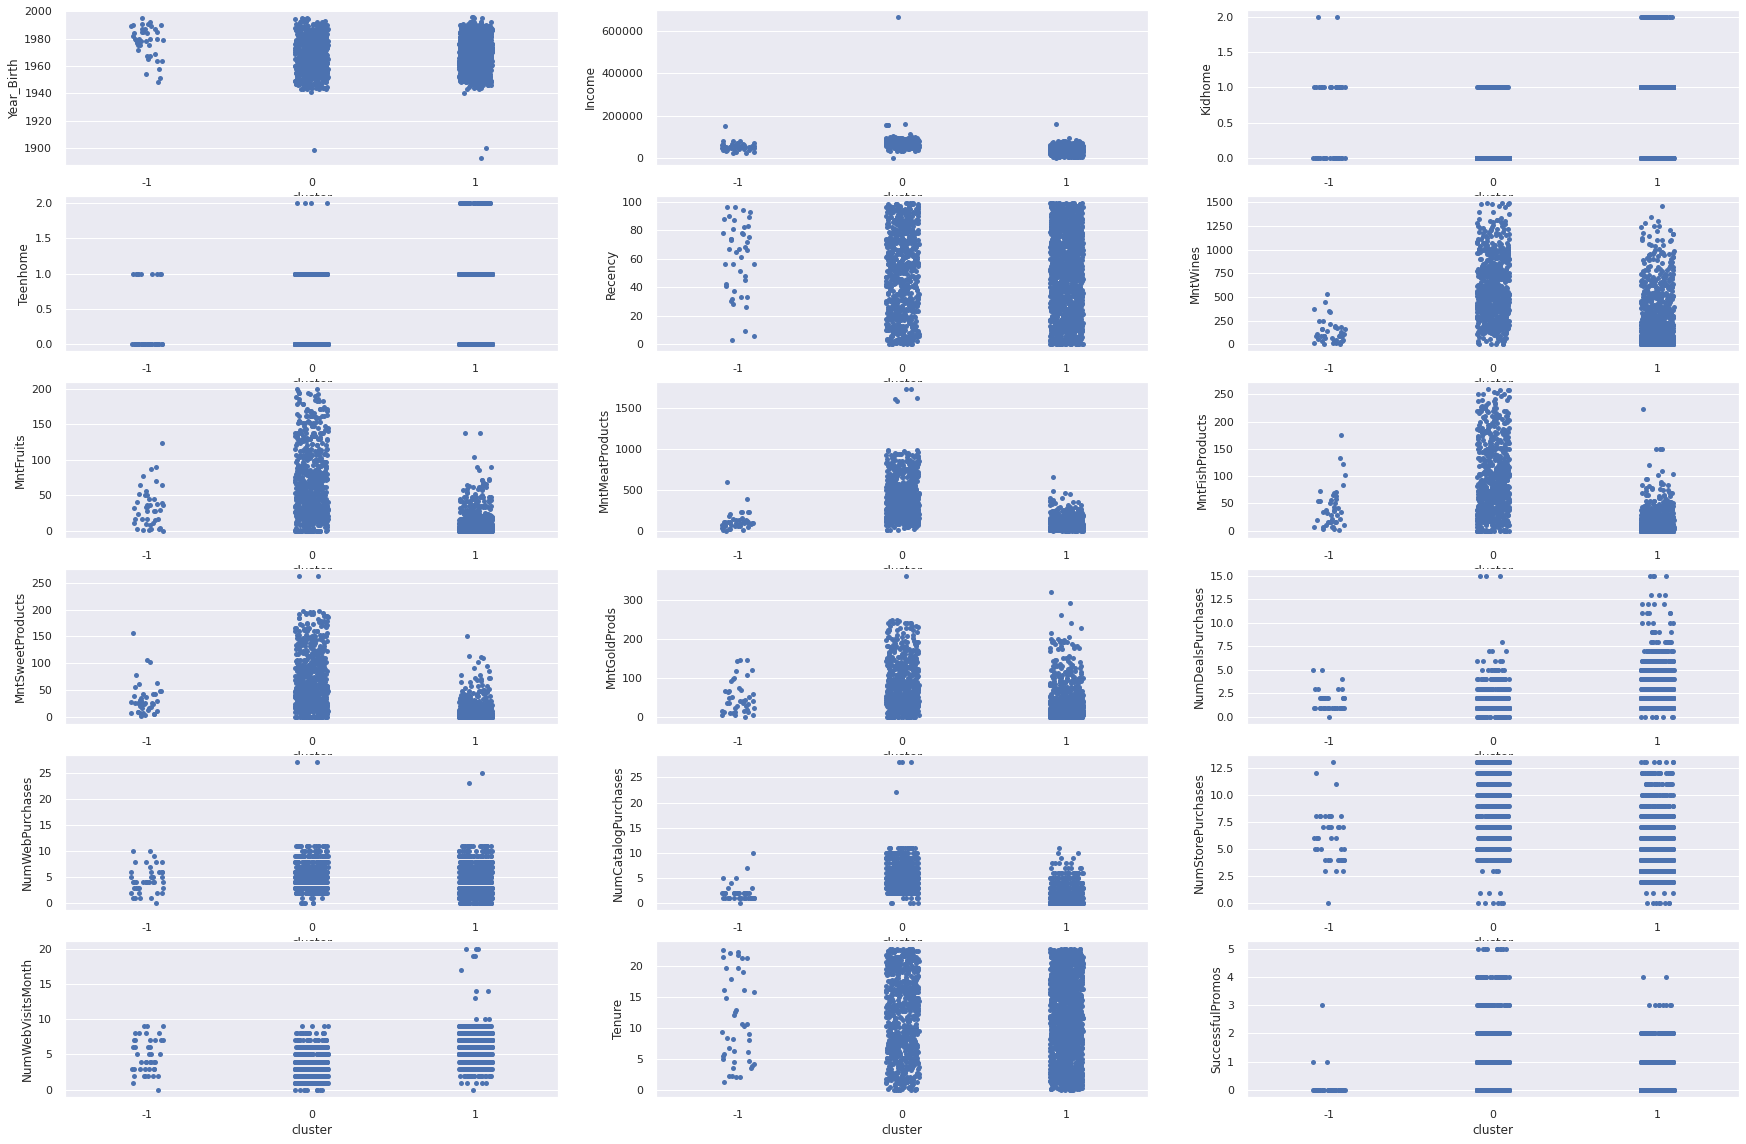

In [483]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30,20))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.stripplot(data=df_w_clusters_db, x = 'cluster', y = column, ax=ax);

Клъстер 1 купуват по-малки количества, но купуват на оферта, имат повече деца и тийнейджъри, оплакват се, имат среден доход.

Клъстер 0 са с малко по-висок доход, пазаруват малко повече по каталог и онлайн.

In [485]:
df_w_clusters_db[df_w_clusters_db['cluster'] == 1].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure,SuccessfulPromos,cluster
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,no,3.7,0,1
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,no,4.5,0,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,no,5.2,0,1
5,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,no,9.6,0,1
6,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,no,19.4,0,1


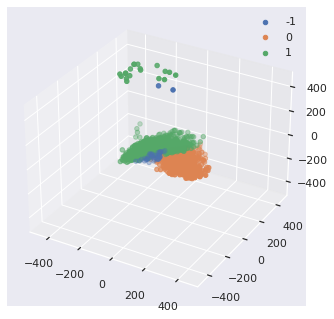

In [580]:
plot_clusters_3D(X_reduced, dbscan.labels_)

### Agglomerative clustering

In [487]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
aggl.fit(X_reduced)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [488]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


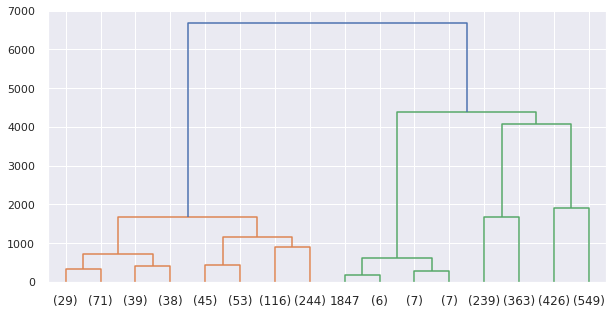

In [489]:
plt.figure(figsize=(10, 5))
plot_dendrogram(aggl, truncate_mode="level", p=3)

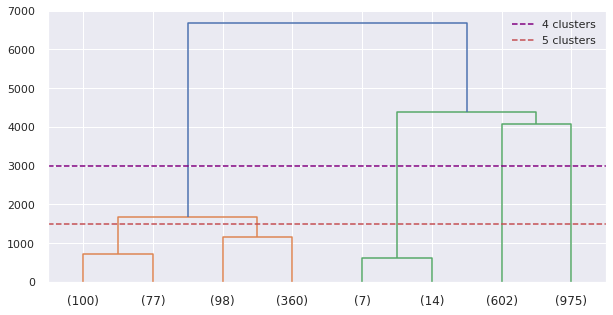

In [492]:
plt.figure(figsize=(10, 5))
plot_dendrogram(aggl, truncate_mode="level", p=2)
plt.axhline(y=3000, color='purple', linestyle='dashed', label='4 clusters')
plt.axhline(y=1500, color='r', linestyle='dashed', label='5 clusters')
plt.legend()
plt.show()

In [493]:
for n in range(2,8):
    aggl_ = AgglomerativeClustering(n_clusters=n)
    aggl_.fit(X_reduced)
    print("Agglomerative clustering with n_clusters = {} has a silhoutte score of {:.2f}".format(n, silhouette_score(X_reduced, aggl_.labels_)))

Agglomerative clustering with n_clusters = 2 has a silhoutte score of 0.47
Agglomerative clustering with n_clusters = 3 has a silhoutte score of 0.49
Agglomerative clustering with n_clusters = 4 has a silhoutte score of 0.44
Agglomerative clustering with n_clusters = 5 has a silhoutte score of 0.36
Agglomerative clustering with n_clusters = 6 has a silhoutte score of 0.31
Agglomerative clustering with n_clusters = 7 has a silhoutte score of 0.31


In [494]:
aggl = AgglomerativeClustering(n_clusters=3)
aggl.fit(X_reduced)

AgglomerativeClustering(n_clusters=3)

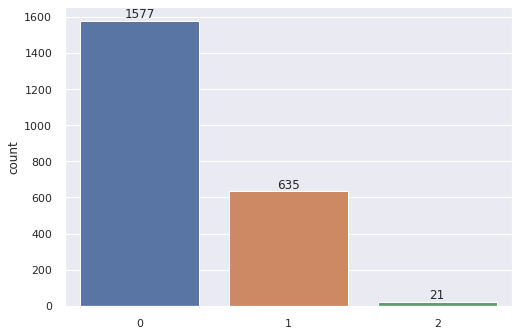

In [495]:
g = sns.countplot(x = aggl.labels_)
for container in g.containers:
    g.bar_label(container)

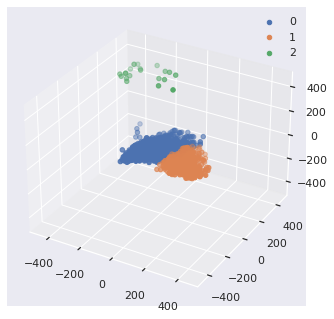

In [579]:
plot_clusters_3D(X_reduced, aggl.labels_)

In [497]:
df_w_clusters_ag = df.copy()
df_w_clusters_ag['cluster'] = aggl.labels_

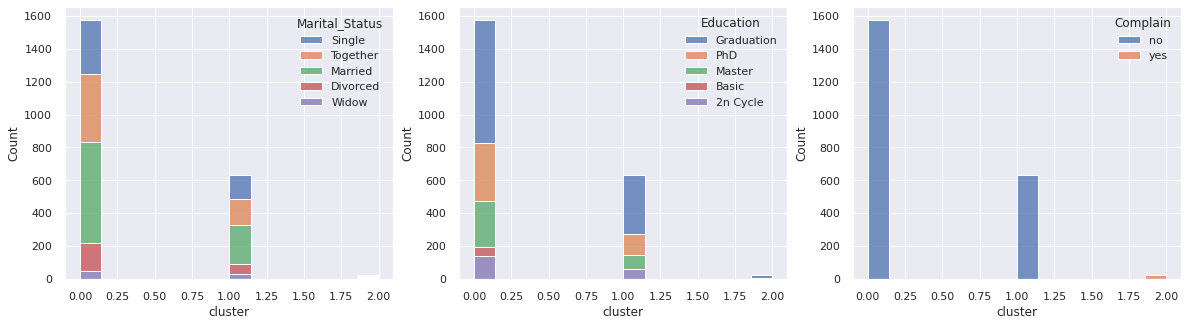

In [498]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for column, ax in zip(['Marital_Status', 'Education', 'Complain'], axes.flat):
    sns.histplot(data=df_w_clusters_ag, x='cluster', hue=column, multiple='stack', ax = ax);
    #sns.countplot(data=df_w_clusters_db, x = 'cluster', hue = column, ax=ax);

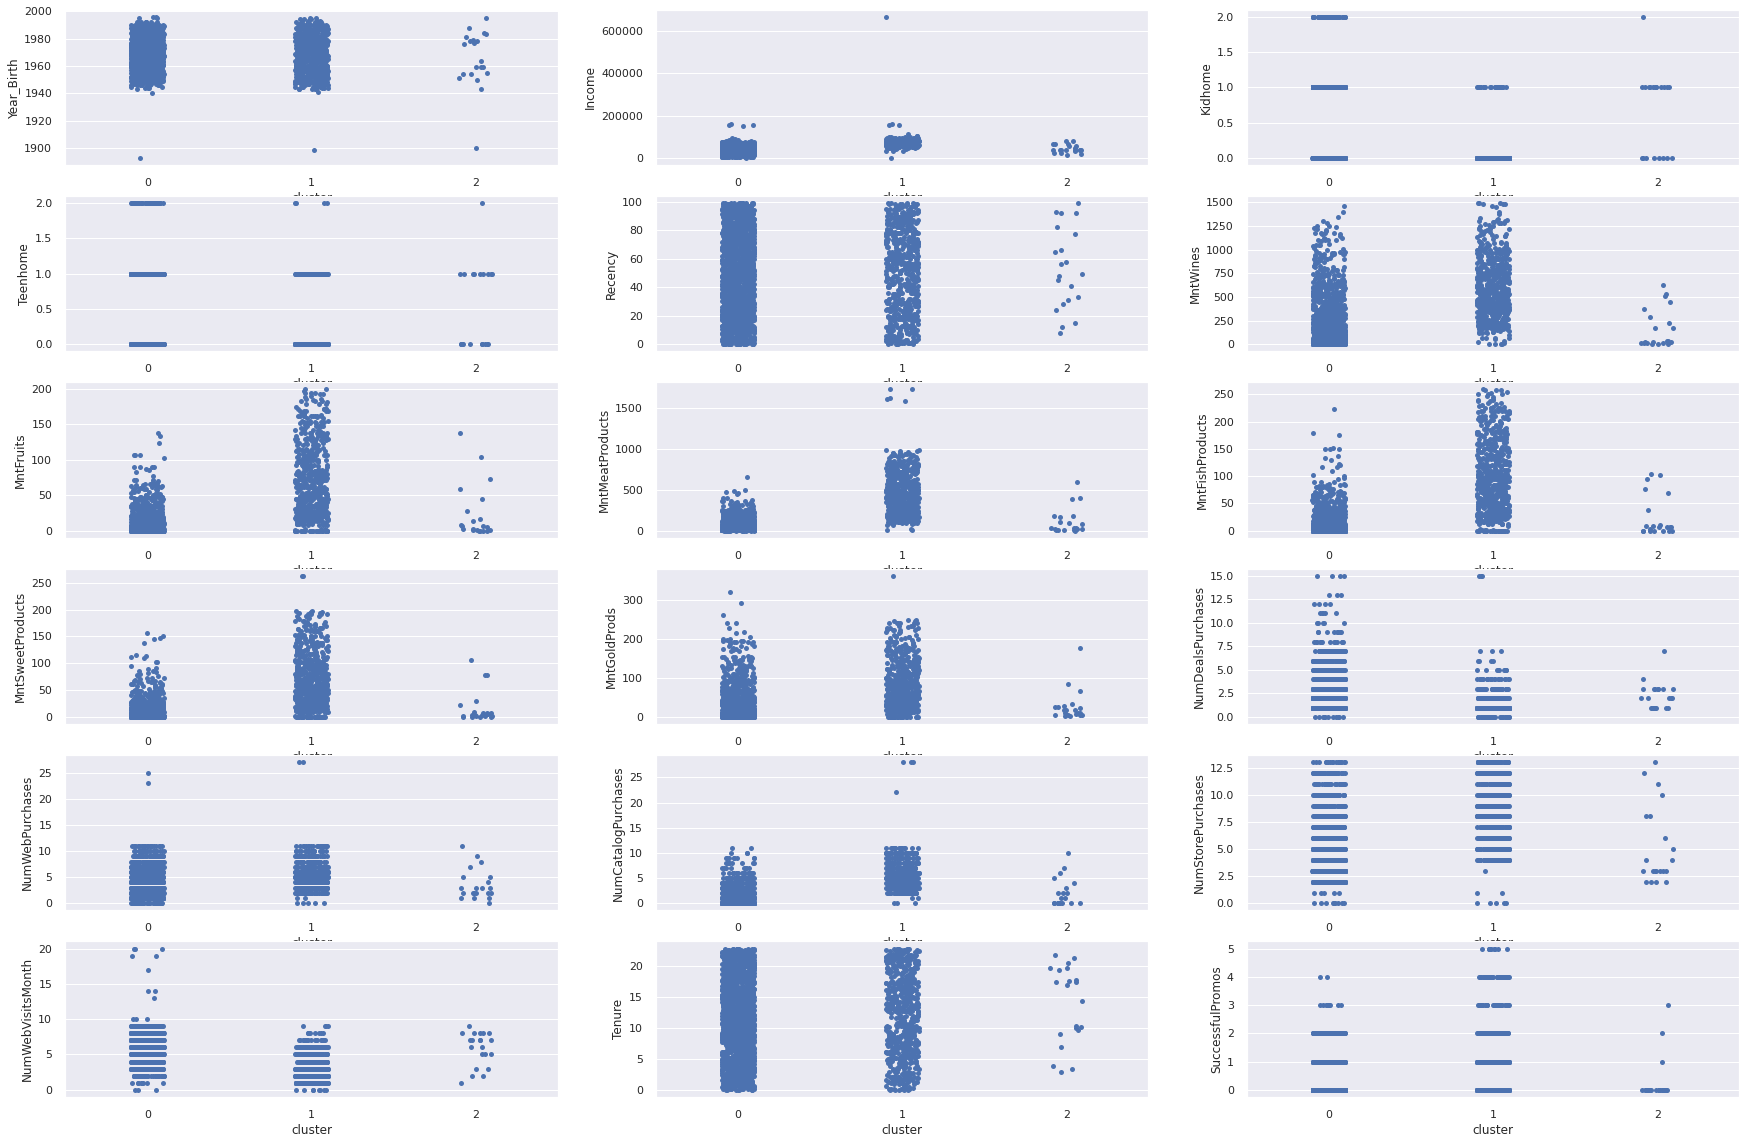

In [499]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30,20))
for column, ax in zip(X_numerical.columns, axes.flat):
    sns.stripplot(data=df_w_clusters_ag, x = 'cluster', y = column, ax=ax);

Клъстер 0 пазарува по-малко, имат повече деца и има малко по-нисък доход и купуват повече на оферта, отколкото клъстер 1.

Клъстер 2 са клиентите, които са се оплаквали, те се характеризират с неуспешни промо кампании.

In [501]:
import pickle
def pickle_model(filename, model):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

def unpickle_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [504]:
for model in [kmeans, aggl, dbscan]:
    pickle_model('./models/' + model.__class__.__name__, model)

## Оценка на алгоритмите

### Графики на клъстерите

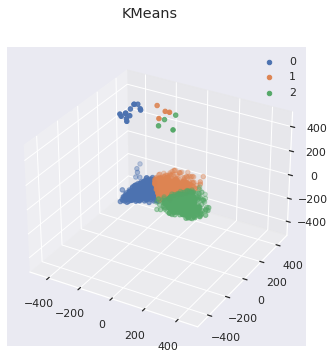

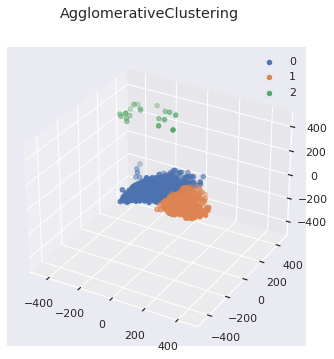

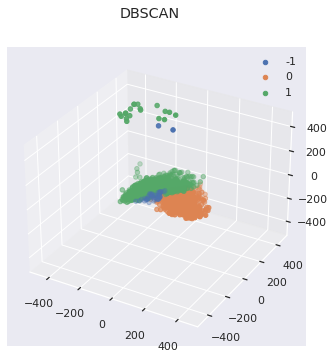

In [581]:
for model in [kmeans, aggl, dbscan]:
    plot_clusters_3D(X_reduced, model.labels_)
    plt.suptitle(model.__class__.__name__)

### Проверка на отдалечените точки

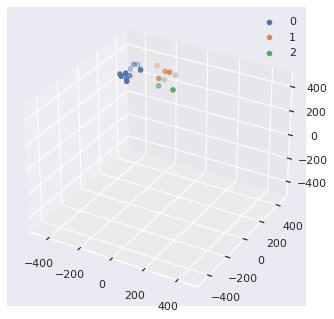

In [595]:
plot_clusters_3D(X_reduced[X_reduced[2] > 200], kmeans.labels_[X_reduced[2] > 200])

In [599]:
df[X_reduced[2] > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure,SuccessfulPromos
78,1976,2n Cycle,Together,26326.0,0,0,12,1,0,5,0,3,9,1,0,0,3,3,yes,9.7,0
147,1981,Graduation,Together,38547.0,1,0,49,6,1,10,0,1,4,1,1,0,2,8,yes,10.0,0
192,1900,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,yes,9.0,0
271,1983,Master,Single,31788.0,1,0,15,16,7,23,0,8,6,3,3,0,4,5,yes,3.3,0
355,1978,Graduation,Single,38643.0,1,1,45,22,2,14,0,1,10,2,2,0,3,7,yes,6.9,0
358,1943,Master,Married,65073.0,0,0,65,629,17,177,69,0,8,1,5,3,5,2,yes,10.2,0
590,1984,PhD,Single,39684.0,1,0,41,19,0,35,6,4,17,2,2,1,2,7,yes,20.5,1
972,1988,2n Cycle,Married,15716.0,1,0,8,16,5,30,8,7,26,3,3,0,4,8,yes,19.5,0
1041,1954,Graduation,Married,38998.0,1,1,92,34,1,14,0,0,5,3,2,0,3,8,yes,19.8,0
1069,1978,Graduation,Married,67023.0,0,0,93,444,44,382,11,8,17,1,3,7,13,2,yes,3.8,0


In [604]:
np.all(df[df['Complain'] == 'yes'].index == df[X_reduced[2] > 200].index)

True

Отдалечените точки са само хората, които са се оплаквали. Според мен не е смислено да са в отделен клъстер, както е при агломеративните клъстери.

### Проверка на шумните точки на DBSCAN

In [605]:
df[dbscan.labels_ == -1]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure,SuccessfulPromos
20,1982,Graduation,Married,37040.0,0,0,41,86,2,73,69,38,48,1,4,2,5,8,no,22.6,0
117,1978,2n Cycle,Married,36550.0,1,0,74,47,90,94,123,103,120,5,9,1,5,9,no,16.2,0
158,1977,Graduation,Together,55375.0,0,1,3,42,11,57,10,28,14,1,1,1,6,2,no,8.3,0
317,1985,Graduation,Single,66503.0,1,0,30,91,64,128,65,3,50,2,4,3,6,3,no,22.4,0
413,1987,Graduation,Single,46923.0,1,0,90,85,44,54,102,78,6,3,5,1,7,7,no,22.2,0
453,1980,2n Cycle,Married,70829.0,1,1,87,141,70,106,72,19,23,2,4,2,8,3,no,6.8,0
502,1990,Basic,Married,24279.0,0,0,6,16,36,21,20,62,108,1,4,1,3,8,no,17.9,0
522,1991,Graduation,Married,42691.0,0,0,48,179,2,64,38,17,58,1,5,1,6,5,no,10.4,0
655,1975,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,no,4.6,0
701,1978,Graduation,Married,71427.0,2,0,26,212,123,177,15,64,23,2,8,2,8,4,no,3.5,0


Очаква се да няма връзка между шумните точки.

### Summary table

In [547]:
def sil_score(X, model, metric = 'euclidean'):
    if model.__class__.__name__ == 'DBSCAN':
        return silhouette_score(X[model.labels_ != -1], model.labels_[model.labels_ != -1], metric = metric)
    else:
        return silhouette_score(X, model.labels_, metric = metric)

def cluster_count(model):
    if model.__class__.__name__ == 'DBSCAN':
        return len(np.unique(model.labels_[model.labels_ != -1]))
    else:
        return model.get_params()['n_clusters']

In [549]:
models = [kmeans, dbscan, aggl]
model_names = [model.__class__.__name__ for model in models]
model_info = [(cluster_count(model), sil_score(X_reduced, model),  sil_score(X_reduced, model, metric='correlation')) for model in models]

summary_df = pd.DataFrame(data=model_info, columns = ['no. clusters', 'silhoutte score', 'silhoutte score (corr)'], index=model_names)
summary_df = summary_df.round(2)
summary_df

,no. clusters,silhoutte score,silhoutte score (corr)
KMeans,3,0.45,0.56
DBSCAN,2,0.47,0.77
AgglomerativeClustering,3,0.49,0.26


Силуетът на Agglomerative при корелационна метрика е нисък, заради зеления клъстер (2). Явно точките имат по-високо корелация с тези от други клъстери и ниска помежду си. Това пак навежда на мисълта, че отделен клъстер само с оплакалите се е странен.

In [557]:
from sklearn.metrics import adjusted_rand_score

model_rands = []
for model1 in models:
        x = [adjusted_rand_score(model1.labels_, model2.labels_) for model2 in models]
        model_rands.append(x)

rand_scores = pd.DataFrame(data = model_rands, columns = model_names, index = model_names)
rand_scores = rand_scores.round(decimals=2)
rand_scores

,KMeans,DBSCAN,AgglomerativeClustering
KMeans,1.00,0.47,0.49
DBSCAN,0.47,1.00,0.76
AgglomerativeClustering,0.49,0.76,1.00


Agglomerative и DBSCAN клъстеризират данните по подобен начин. Най-вече се различават по оплакалите се.

## Заключение

Алгоритмите клъстеризираха клиентите на две главни групи - тези, които пазаруват често и в голям обем и имат висок доход и другите, които не пазаруват често, в малки количества, но откликват на промоции и се възползват от оферти.

Според мен най-добре са се справили KMeans и DBSCAN. Крайният избор мисля, че зависи от коя държава са данните и нейната класова структура, защото в някои държави има "средна класа", на която ще съответства третия клъстер, а в други няма. 

Подобрения може да са
- да се комбинират колоните с купени количества до две или три категории: Food и Gold; Food, Wine и Gold; Healthy, Snacks и Gold, etc.
- да се премахнат категорийните характеристики, за да се приложи PCA ефективно или NMF, тъй като не изглежда да носят важна информация
- да се използват Agglomerative/DBSCAN с параметър матрица на разстоянията на Gower (метрика подходяща за категорийни + числени характеристики)
- върху t-SNE резултата да се пусне DBSCAN